# IMPORTING LIBRARIES

In [1]:
from selenium import webdriver
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager
import re
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# SCRAPING DATA

In [2]:
driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.29M/6.29M [00:01<00:00, 5.93MB/s]
c:\users\omeza\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  """Entry point for launching an IPython kernel.


In [3]:
laptops = []
titles=[]
actual_prices=[]
ratings=[]
deliverys=[]
price_=[]


for i in range(1,21):
    url = 'https://www.amazon.in/s?k=laptops&page={}&crid=C7BGHXL2N6PH&qid=1660230866&sprefix=laptops%2Caps%2C223&ref=sr_pg_2'.format(i)
    driver.get(url)
    all_laptops = driver.find_elements("xpath",".//div[@class='a-section a-spacing-small a-spacing-top-small']")
    for product in all_laptops:
        
        title = product.find_elements("xpath",".//span[@class='a-size-medium a-color-base a-text-normal']")
        for _ in title:
            
            
            titles.append(_.text)
            
        actual_price = product.find_elements("xpath",".//span[@class='a-price a-text-price']")
        for _ in actual_price:
            if _ == None:
                actual_prices.append('-')
            else:
                actual_prices.append(_.text)
            
        rating = product.find_elements("xpath",".//span[@class='a-size-base s-underline-text']")
        for _ in rating:
            if _ == None:
                ratings.append('-')
            else:
                ratings.append(_.text)
            
        delivary = product.find_elements("xpath",".//span[@class='a-color-base a-text-bold']")
        for _ in delivary:
            deliverys.append(_.text)
            
        price=product.find_elements("xpath",".//span[@class='a-price-whole']")
        for _ in price:
            if _ == None:
                price_.append('-')
            else:
                price_.append(_.text)
        
        laptop={
            'title':titles,
            'actual_price':actual_prices,
            'rating':ratings,
            'discount_price':price_
        }
        laptops.append(laptop)
       
driver.close()

# MAKING DATASET

In [4]:
df=pd.DataFrame(laptops)
df.head()

,title,actual_price,rating,discount_price
0,[Acer Aspire 5 Gaming Intel Core i5 12th gen (...,"[₹81,999, ₹41,999, ₹47,206, ₹59,500, ₹60,890, ...","[92, 108, 976, 6, 1,066, 230, 628, 1,066, 176,...","[56,999, 31,990, 37,999, 19,599, 33,990, 32,99..."
1,[Acer Aspire 5 Gaming Intel Core i5 12th gen (...,"[₹81,999, ₹41,999, ₹47,206, ₹59,500, ₹60,890, ...","[92, 108, 976, 6, 1,066, 230, 628, 1,066, 176,...","[56,999, 31,990, 37,999, 19,599, 33,990, 32,99..."
2,[Acer Aspire 5 Gaming Intel Core i5 12th gen (...,"[₹81,999, ₹41,999, ₹47,206, ₹59,500, ₹60,890, ...","[92, 108, 976, 6, 1,066, 230, 628, 1,066, 176,...","[56,999, 31,990, 37,999, 19,599, 33,990, 32,99..."
3,[Acer Aspire 5 Gaming Intel Core i5 12th gen (...,"[₹81,999, ₹41,999, ₹47,206, ₹59,500, ₹60,890, ...","[92, 108, 976, 6, 1,066, 230, 628, 1,066, 176,...","[56,999, 31,990, 37,999, 19,599, 33,990, 32,99..."
4,[Acer Aspire 5 Gaming Intel Core i5 12th gen (...,"[₹81,999, ₹41,999, ₹47,206, ₹59,500, ₹60,890, ...","[92, 108, 976, 6, 1,066, 230, 628, 1,066, 176,...","[56,999, 31,990, 37,999, 19,599, 33,990, 32,99..."


# DATA PROCESSING

In [5]:
Title = []
Actual_price=[]
Ratings = []
Discount = []
for i in range(len(df)):
    if df['title'][i]==None:
        Title.append('-')
    else:
        Title.append(df['title'][i])
    if df['actual_price'][i]==None:
        Actual_price.append('-')
    else:
        Actual_price.append(df['actual_price'][i])
    if df['rating'][i]==None:
        rating.append('-')
    else:
        Ratings.append(df['rating'][i])
    if df['discount_price'][i]==None:
        discount_price.append('-')
    else:
        Discount.append(df['discount_price'][i])
   

In [6]:
a = Title[1]
b = Actual_price[1]
c = Discount[1]
d = Ratings[1]
data={
    'title':a,
    'price':b,
    'discounted_price':c,
    'rating':d,
}


In [7]:
l = (len(a),len(b),len(c),len(d))
length=min(l)

In [8]:

titles = []
price=[]
dis=[]
rat=[]
for i in range(0,length):
    titles.append(a[i])
    
    price.append(b[i])
    
    dis.append(c[i])
    
    rat.append(d[i])
        
data={
    'TITLE':titles,
    'PRICE':price,
    'DISCOUNT_PRICE':dis,
    'REVIEWS':rat,
   
}

In [9]:
df1=pd.DataFrame(data)
df1.head()

,TITLE,PRICE,DISCOUNT_PRICE,REVIEWS
0,Acer Aspire 5 Gaming Intel Core i5 12th gen (1...,"₹81,999","56,999",92
1,Acer Extensa 15 Lightweight Laptop 11th Gen In...,"₹41,999","31,990",108
2,"HP 14s, 11th Gen Intel Core i3-1115G4, 8GB RAM...","₹47,206","37,999",976
3,(Renewed) Lenovo Thinkpad E480 7th Gen Intel C...,"₹59,500","19,599",6
4,Lenovo IdeaPad Slim 3 Intel Core i3-1115G4 11t...,"₹60,890","33,990","1,066"


# DATA CLEANING

In [10]:
# Brand

regex = r'(^\w+)'

df1['BRAND'] = df1['TITLE'].apply(lambda x : re.findall(regex, x))


In [11]:
# RAM Information

regex = r'[\d]GB\sRAM\s|[\d]GB\sSDRAM|[\d]GB\sGDDR4|[\d]GB\s|[\d]\sGB|\s[\d]Gb'

df1['RAM'] = df1['TITLE'].apply(lambda x : re.findall(regex, x))

In [12]:
#PROCESSOR

regex = r'\s\bIntel\s|\s\bAMD{1}\sRyzen|\sRyzen\s|Intel\sCore\s'

df1['PROCESSOR'] = df1['TITLE'].apply(lambda x : re.findall(regex,x))

In [13]:
# storage

regex = r'[\d]{3}GB|[\d]TB|[\d]{3}\s+GB|[\d]{3}Gb|[\d]{3}\sSSD'

df1['STORAGE'] = df1['TITLE'].apply(lambda x : re.findall(regex, x))

In [14]:

df1.PROCESSOR = df1.PROCESSOR.apply(lambda x : ''.join(x))
df1.BRAND = df1.BRAND.apply(lambda x : ''.join(x))
df1.RAM = df1.RAM.apply(lambda x : ''.join(x))
df1.STORAGE = df1.STORAGE.apply(lambda x : ''.join(x))

In [15]:
df1

,TITLE,PRICE,DISCOUNT_PRICE,REVIEWS,BRAND,RAM,PROCESSOR,STORAGE
0,Acer Aspire 5 Gaming Intel Core i5 12th gen (1...,"₹81,999","56,999",92,Acer,8 GB2 GB4 GB,Intel,512 GB
1,Acer Extensa 15 Lightweight Laptop 11th Gen In...,"₹41,999","31,990",108,Acer,8 GB2GB,Intel,512GB
2,"HP 14s, 11th Gen Intel Core i3-1115G4, 8GB RAM...","₹47,206","37,999",976,HP,8GB 6GB,Intel,256GB
3,(Renewed) Lenovo Thinkpad E480 7th Gen Intel C...,"₹59,500","19,599",6,,8 GB0 GB,Intel,500 GB
4,Lenovo IdeaPad Slim 3 Intel Core i3-1115G4 11t...,"₹60,890","33,990","1,066",Lenovo,6GB,Intel,256GB
...,...,...,...,...,...,...,...,...
365,Lenovo ThinkPad E15 Intel Core i3 11th Gen 15....,"₹38,990","26,990",9,Lenovo,8GB 6GB,Intel,256GB
366,"ASUS Eeebook 14, 14-inch (35.56 cms) HD, Intel...","₹50,000","20,998",5,ASUS,6GB,Intel,256GB
367,(Renewed) Lenovo Intel 4th Gen Core i5 14.1-In...,"₹78,999","71,990",35,,8 GB6 GB,Intel,256 GB
368,Microsoft Surface Laptop GO2 Touch Screen 12.4...,"₹89,999","18,499",24,Microsoft,8GB RAM,Intel,128 SSD


In [16]:
def ram(x):
    for i in range(0,len(x)):
        a=x[i]
        s=[]
        for j in a:
            if j==' ':
                break
            s.append(j)
        s1=''.join(s)
        df1['RAM'][i]=s1
a=df1['RAM']
ram(a)

In [17]:
df1['PRICE']=df1['PRICE'].replace({'₹':''},regex=True)
df1['DISCOUNT_PRICE']=df1['DISCOUNT_PRICE'].replace({',':''},regex=True)
df1['REVIEWS']=df1['REVIEWS'].replace({',':''},regex=True)
df1['PRICE']=df1['PRICE'].replace({',':''},regex=True)

In [18]:
df1.head()

,TITLE,PRICE,DISCOUNT_PRICE,REVIEWS,BRAND,RAM,PROCESSOR,STORAGE
0,Acer Aspire 5 Gaming Intel Core i5 12th gen (1...,81999,56999,92,Acer,8,Intel,512 GB
1,Acer Extensa 15 Lightweight Laptop 11th Gen In...,41999,31990,108,Acer,8,Intel,512GB
2,"HP 14s, 11th Gen Intel Core i3-1115G4, 8GB RAM...",47206,37999,976,HP,8GB,Intel,256GB
3,(Renewed) Lenovo Thinkpad E480 7th Gen Intel C...,59500,19599,6,,8,Intel,500 GB
4,Lenovo IdeaPad Slim 3 Intel Core i3-1115G4 11t...,60890,33990,1066,Lenovo,6GB,Intel,256GB


In [19]:
df1['TITLE'][36]

'HP NB 255 G8 Laptop 15.6 inch (39.6 cm) AMD Ryzen 3-3250U/8GB DDR4 Ram/1TB HDD/HD/Windows 11/AMD Radeon Vega 8 Graphics/Dark Ash Silver/1.74Kg) 64Q84PA'

In [20]:
df2=df1.loc[:,['TITLE','BRAND','PROCESSOR','RAM','STORAGE','REVIEWS','PRICE','DISCOUNT_PRICE']]
df2

,TITLE,BRAND,PROCESSOR,RAM,STORAGE,REVIEWS,PRICE,DISCOUNT_PRICE
0,Acer Aspire 5 Gaming Intel Core i5 12th gen (1...,Acer,Intel,8,512 GB,92,81999,56999
1,Acer Extensa 15 Lightweight Laptop 11th Gen In...,Acer,Intel,8,512GB,108,41999,31990
2,"HP 14s, 11th Gen Intel Core i3-1115G4, 8GB RAM...",HP,Intel,8GB,256GB,976,47206,37999
3,(Renewed) Lenovo Thinkpad E480 7th Gen Intel C...,,Intel,8,500 GB,6,59500,19599
4,Lenovo IdeaPad Slim 3 Intel Core i3-1115G4 11t...,Lenovo,Intel,6GB,256GB,1066,60890,33990
...,...,...,...,...,...,...,...,...
365,Lenovo ThinkPad E15 Intel Core i3 11th Gen 15....,Lenovo,Intel,8GB,256GB,9,38990,26990
366,"ASUS Eeebook 14, 14-inch (35.56 cms) HD, Intel...",ASUS,Intel,6GB,256GB,5,50000,20998
367,(Renewed) Lenovo Intel 4th Gen Core i5 14.1-In...,,Intel,8,256 GB,35,78999,71990
368,Microsoft Surface Laptop GO2 Touch Screen 12.4...,Microsoft,Intel,8GB,128 SSD,24,89999,18499


In [21]:
df2.fillna(0)

,TITLE,BRAND,PROCESSOR,RAM,STORAGE,REVIEWS,PRICE,DISCOUNT_PRICE
0,Acer Aspire 5 Gaming Intel Core i5 12th gen (1...,Acer,Intel,8,512 GB,92,81999,56999
1,Acer Extensa 15 Lightweight Laptop 11th Gen In...,Acer,Intel,8,512GB,108,41999,31990
2,"HP 14s, 11th Gen Intel Core i3-1115G4, 8GB RAM...",HP,Intel,8GB,256GB,976,47206,37999
3,(Renewed) Lenovo Thinkpad E480 7th Gen Intel C...,,Intel,8,500 GB,6,59500,19599
4,Lenovo IdeaPad Slim 3 Intel Core i3-1115G4 11t...,Lenovo,Intel,6GB,256GB,1066,60890,33990
...,...,...,...,...,...,...,...,...
365,Lenovo ThinkPad E15 Intel Core i3 11th Gen 15....,Lenovo,Intel,8GB,256GB,9,38990,26990
366,"ASUS Eeebook 14, 14-inch (35.56 cms) HD, Intel...",ASUS,Intel,6GB,256GB,5,50000,20998
367,(Renewed) Lenovo Intel 4th Gen Core i5 14.1-In...,,Intel,8,256 GB,35,78999,71990
368,Microsoft Surface Laptop GO2 Touch Screen 12.4...,Microsoft,Intel,8GB,128 SSD,24,89999,18499


# DATA ANALYSIS

In [22]:
df2.info

<bound method DataFrame.info of                                                  TITLE      BRAND PROCESSOR  \
0    Acer Aspire 5 Gaming Intel Core i5 12th gen (1...       Acer    Intel    
1    Acer Extensa 15 Lightweight Laptop 11th Gen In...       Acer    Intel    
2    HP 14s, 11th Gen Intel Core i3-1115G4, 8GB RAM...         HP    Intel    
3    (Renewed) Lenovo Thinkpad E480 7th Gen Intel C...               Intel    
4    Lenovo IdeaPad Slim 3 Intel Core i3-1115G4 11t...     Lenovo    Intel    
..                                                 ...        ...       ...   
365  Lenovo ThinkPad E15 Intel Core i3 11th Gen 15....     Lenovo    Intel    
366  ASUS Eeebook 14, 14-inch (35.56 cms) HD, Intel...       ASUS    Intel    
367  (Renewed) Lenovo Intel 4th Gen Core i5 14.1-In...               Intel    
368  Microsoft Surface Laptop GO2 Touch Screen 12.4...  Microsoft    Intel    
369  (Renewed)Lenovo ThinkPad L450 5th Gen Intel Co...               Intel    

     RAM  STORAGE R

In [23]:
df2['BRAND'].unique()

array(['Acer', 'HP', '', 'Lenovo', 'ASUS', 'Dell', 'Hp', 'Redmi', 'Honor',
       'Mi', 'LG', 'Xiaomi', 'MSI', 'AVITA', 'Samsung', 'Fujitsu', 'Asus',
       'CHUWI', 'Infinix', 'AGB', 'Microsoft'], dtype=object)

In [24]:
df2.isnull()

,TITLE,BRAND,PROCESSOR,RAM,STORAGE,REVIEWS,PRICE,DISCOUNT_PRICE
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
365,False,False,False,False,False,False,False,False
366,False,False,False,False,False,False,False,False
367,False,False,False,False,False,False,False,False
368,False,False,False,False,False,False,False,False


# UNI-VARIATE ANALYSIS

c:\users\omeza\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BRAND', ylabel='count'>

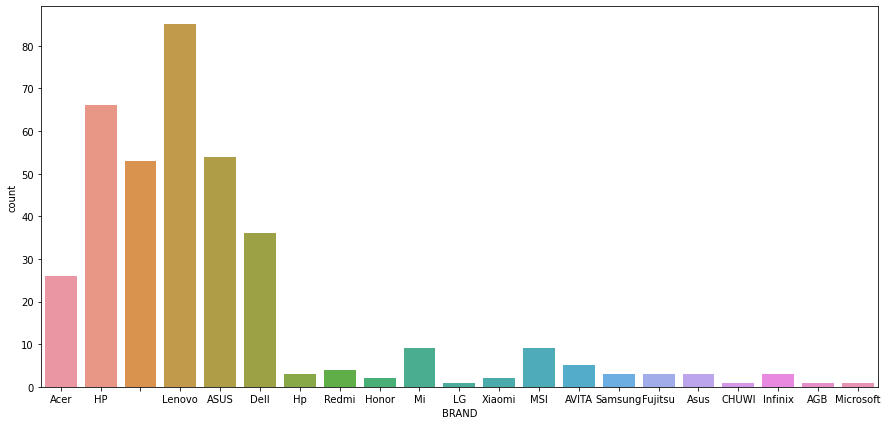

In [25]:
plt.figure(figsize=(15, 7))
sns.countplot(df2['BRAND'])

c:\users\omeza\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

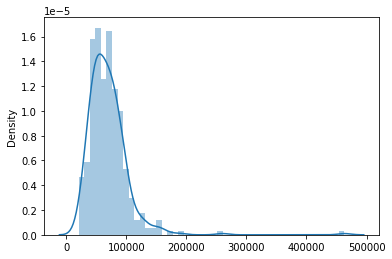

In [26]:
sns.distplot(x=df2['PRICE'])

c:\users\omeza\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

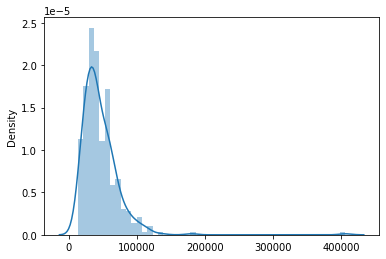

In [27]:
sns.distplot(x=df2['DISCOUNT_PRICE'])

c:\users\omeza\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

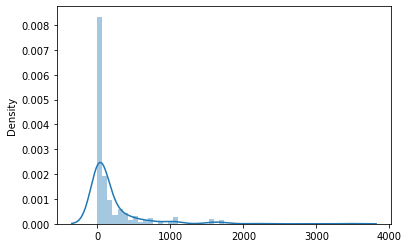

In [28]:
sns.distplot(x=df2['REVIEWS'])

<AxesSubplot:xlabel='PRICE', ylabel='Count'>

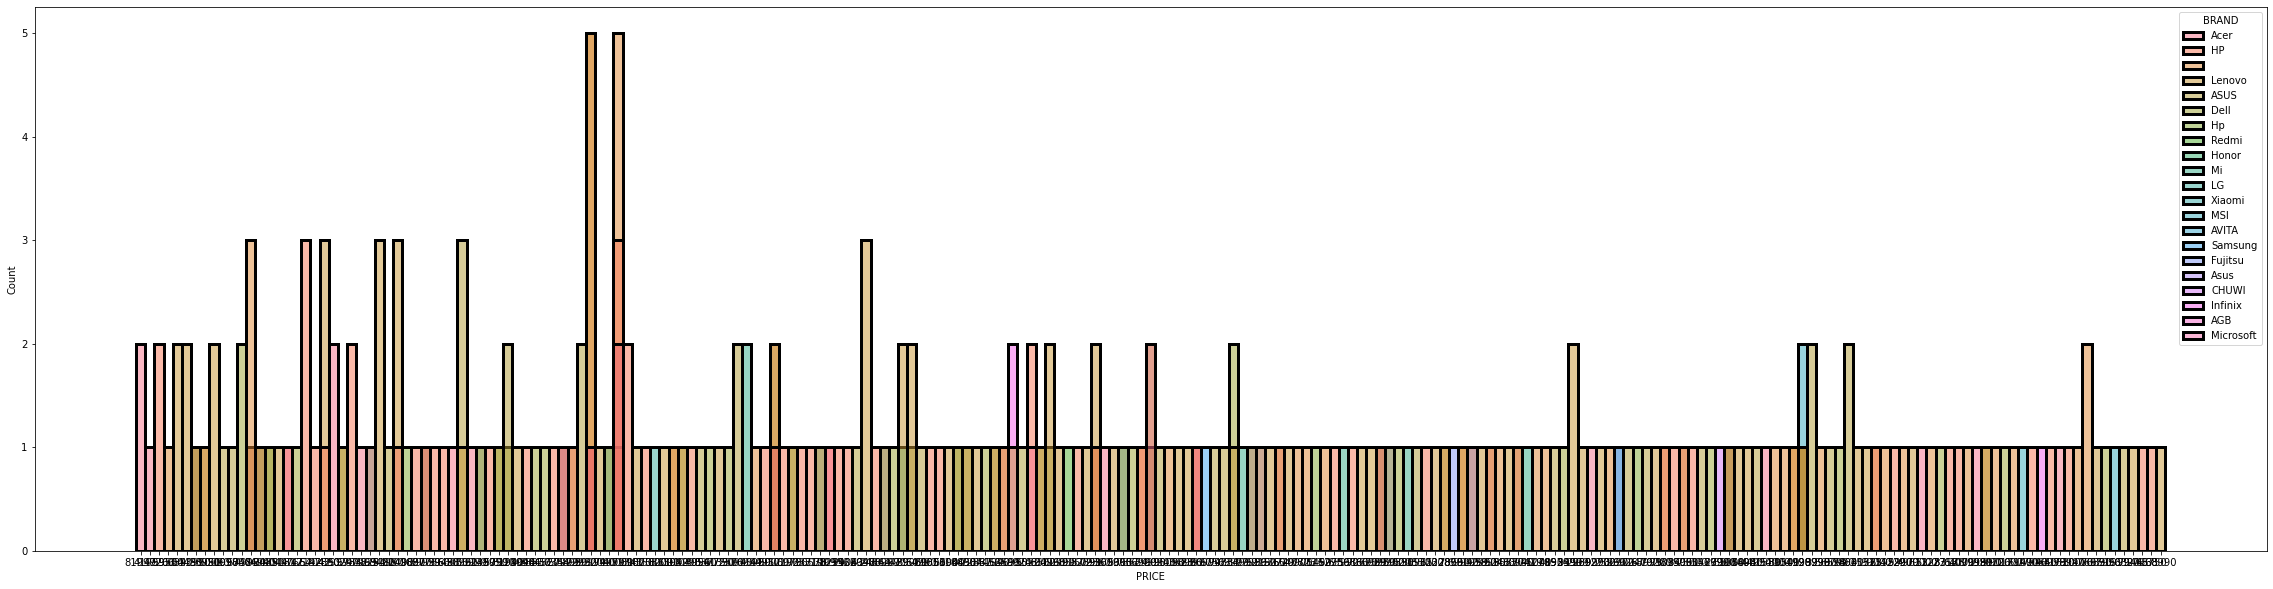

In [29]:
plt.figure(figsize=(40, 10))
sns.histplot(x=df2['PRICE'],linewidth=3,hue=df2['BRAND'])

In [30]:
#df2.to_csv("amazon")
df2.PRICE=df2.PRICE.astype(int)
df2.DISCOUNT_PRICE=df2.DISCOUNT_PRICE.astype(int)
df2.REVIEWS=df2.REVIEWS.astype(int)

<AxesSubplot:xlabel='DISCOUNT_PRICE'>

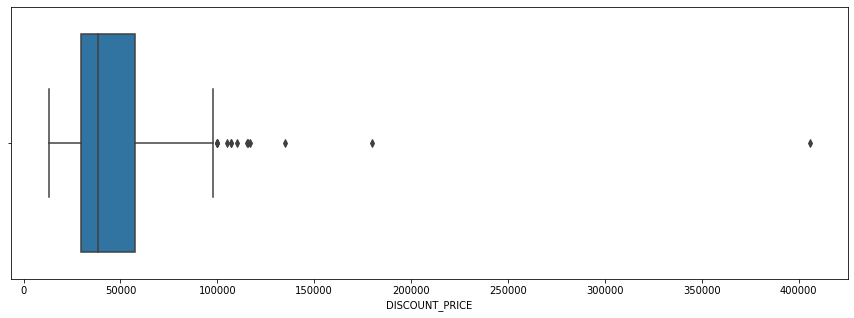

In [31]:
plt.figure(figsize=(15, 5))
sns.boxplot(x = df2['DISCOUNT_PRICE'])

<AxesSubplot:xlabel='PRICE'>

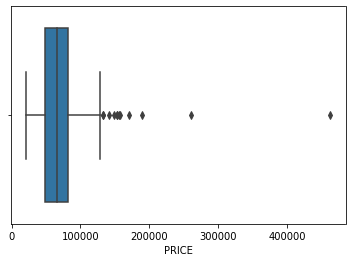

In [32]:
sns.boxplot(x=df2['PRICE'],data=df2)

<AxesSubplot:xlabel='DISCOUNT_PRICE', ylabel='Count'>

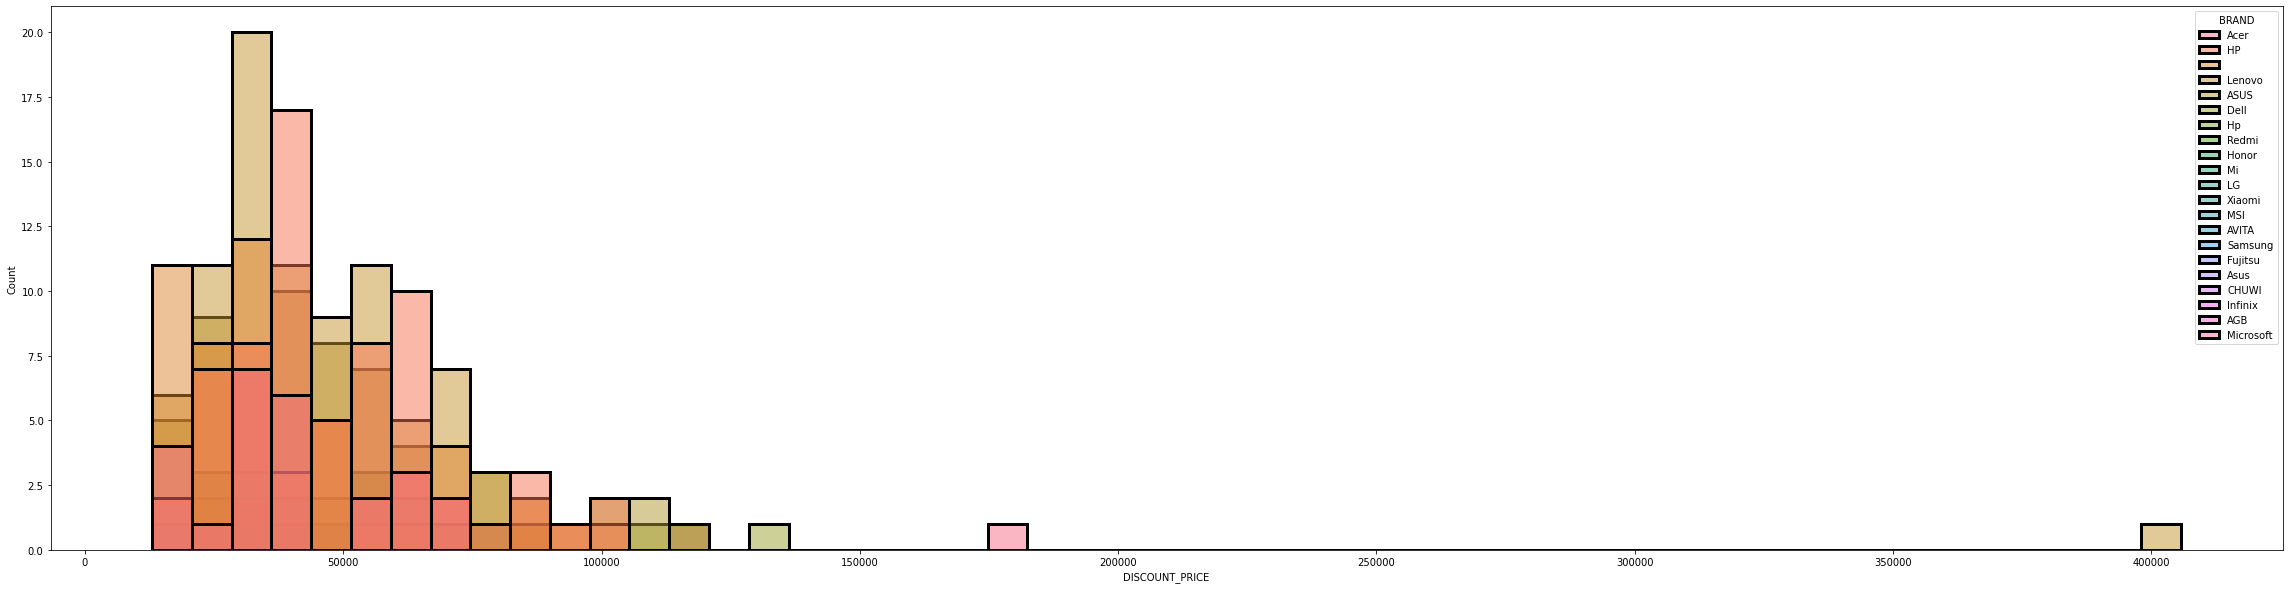

In [33]:
plt.figure(figsize=(40, 10))
sns.histplot(x=df2['DISCOUNT_PRICE'],linewidth=3,hue=df2['BRAND'])

<AxesSubplot:xlabel='REVIEWS', ylabel='Count'>

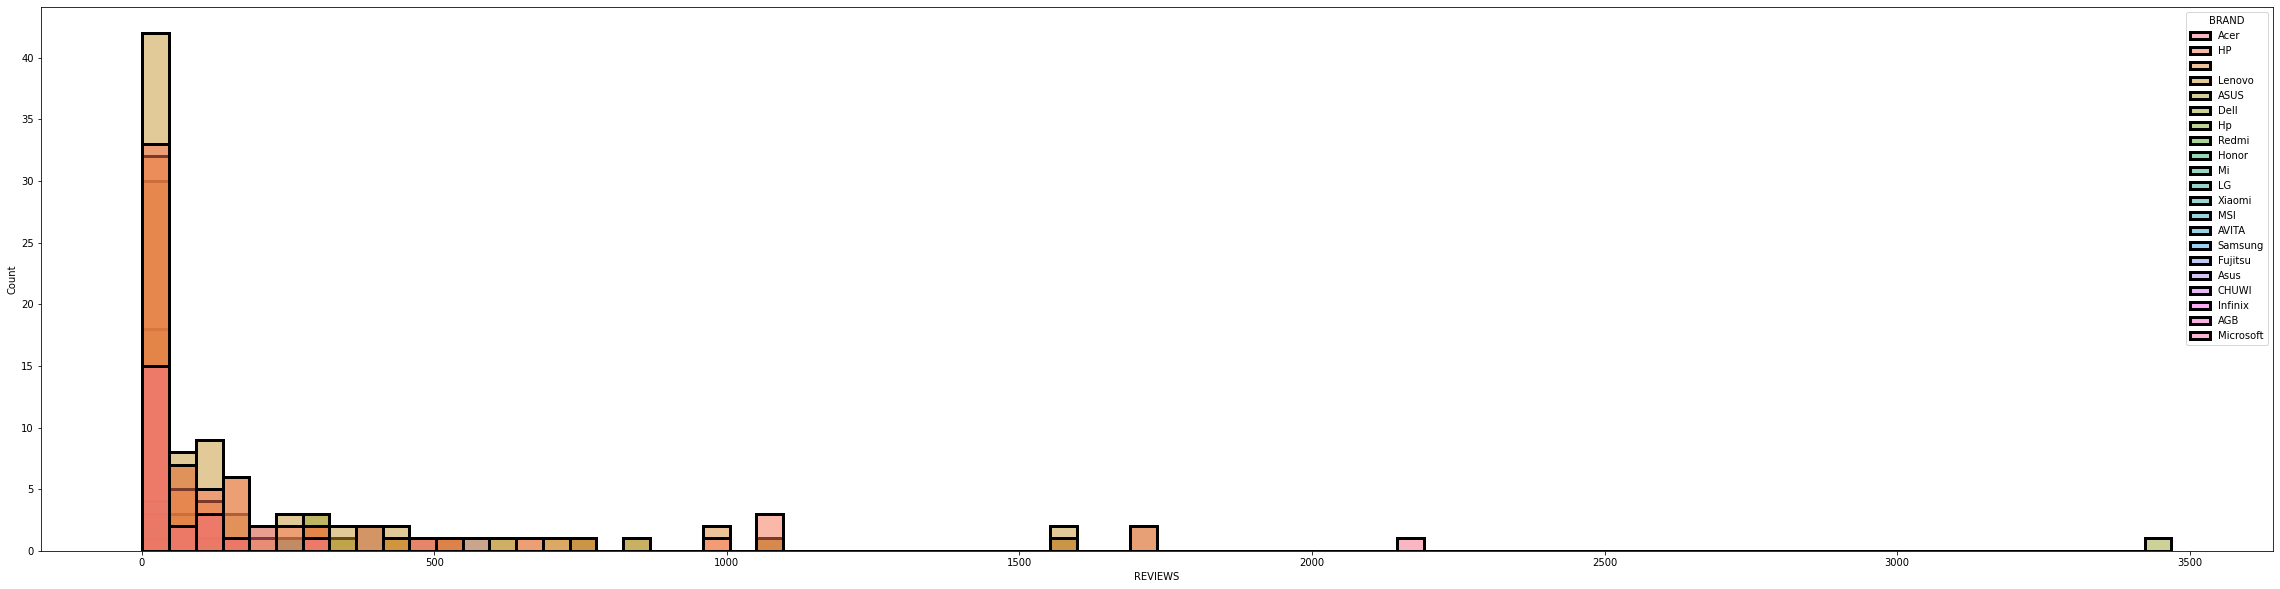

In [34]:
plt.figure(figsize=(40, 10))
sns.histplot(x=df2['REVIEWS'],linewidth=3,hue=df2['BRAND'])

c:\users\omeza\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='RAM', ylabel='count'>

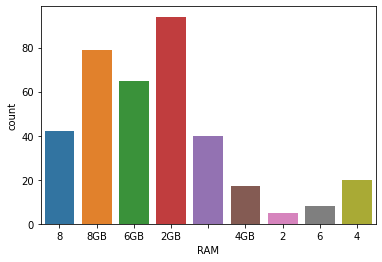

In [35]:
sns.countplot(df2['RAM'])

c:\users\omeza\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='STORAGE', ylabel='count'>

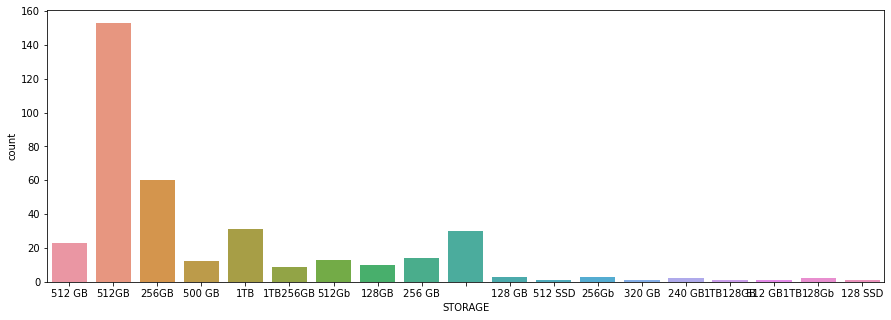

In [36]:
plt.figure(figsize=(15,5))
sns.countplot(df2['STORAGE'])

# BI-VARIATE ANALYSIS

<AxesSubplot:xlabel='BRAND', ylabel='PRICE'>

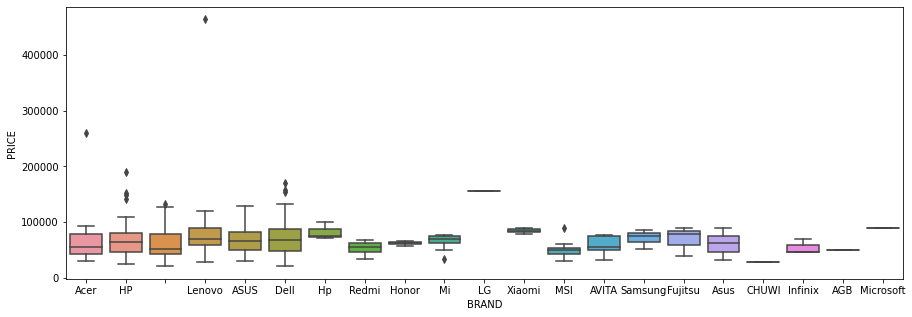

In [37]:
plt.figure(figsize=(15, 5))
sns.boxplot(x= df2['BRAND'],y = df2['PRICE'])

<AxesSubplot:xlabel='BRAND', ylabel='PRICE'>

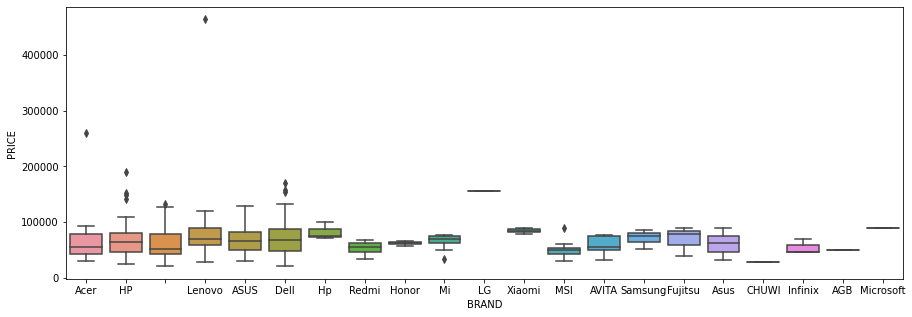

In [38]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df2['BRAND'],y=df2['PRICE'],data=df2)

<AxesSubplot:xlabel='BRAND', ylabel='DISCOUNT_PRICE'>

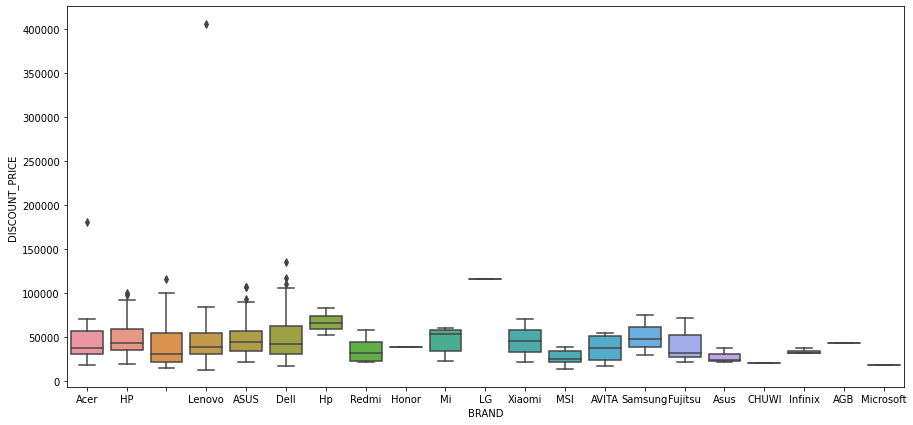

In [39]:
plt.figure(figsize=(15,7))
sns.boxplot(x=df2['BRAND'],y=df2['DISCOUNT_PRICE'],data=df2)

c:\users\omeza\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PRICE', ylabel='DISCOUNT_PRICE'>

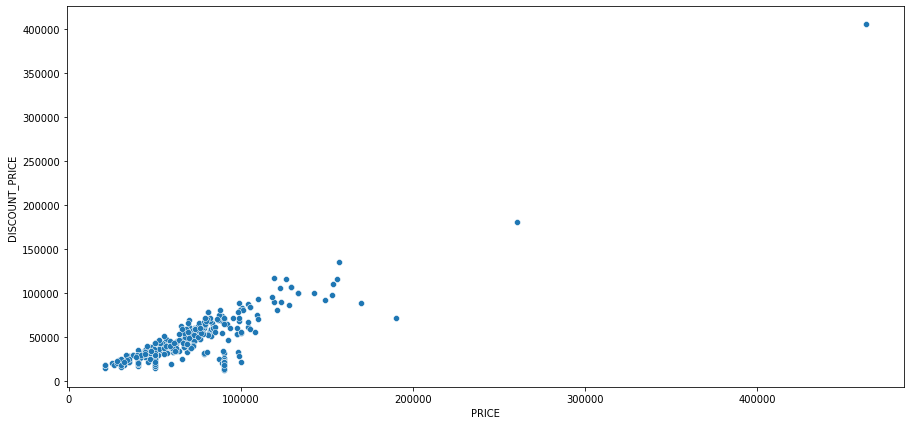

In [40]:
plt.figure(figsize=(15,7))
sns.scatterplot(df2['PRICE'],df2['DISCOUNT_PRICE'])

c:\users\omeza\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DISCOUNT_PRICE', ylabel='PRICE'>

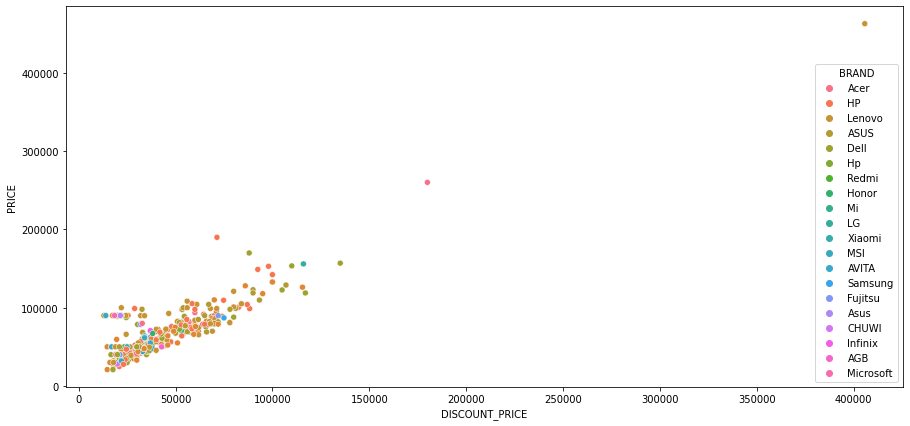

In [41]:
plt.figure(figsize=(15,7))
sns.scatterplot(df2['DISCOUNT_PRICE'],df2['PRICE'],hue=df2['BRAND'])

c:\users\omeza\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BRAND', ylabel='PRICE'>

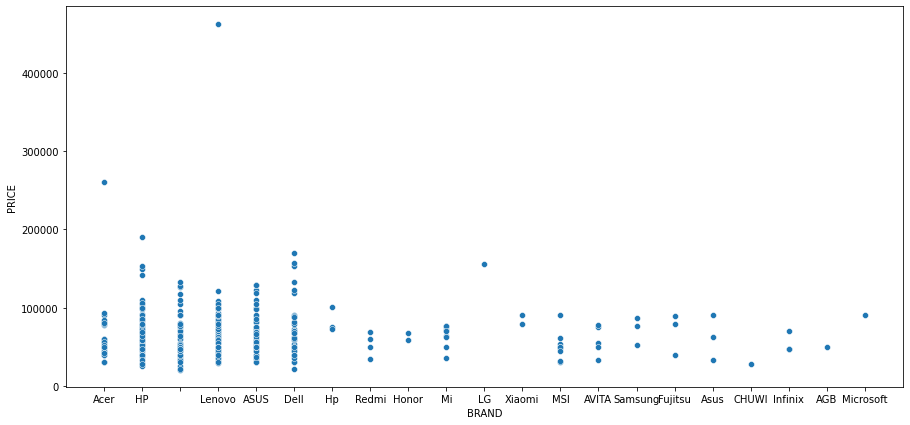

In [42]:
plt.figure(figsize=(15,7))
sns.scatterplot(df2['BRAND'],df2['PRICE'])

c:\users\omeza\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BRAND', ylabel='DISCOUNT_PRICE'>

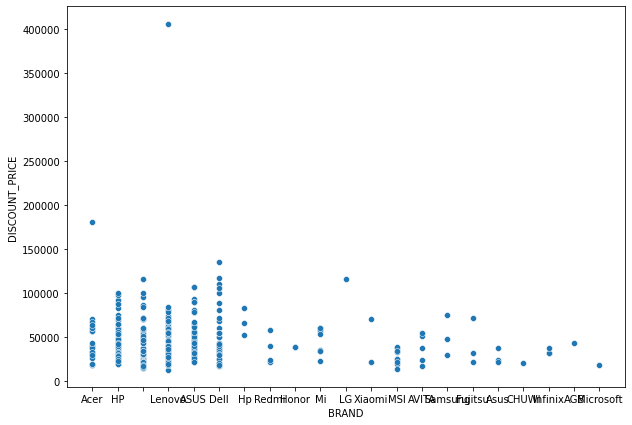

In [43]:
plt.figure(figsize=(10,7))
sns.scatterplot(df2['BRAND'],df2['DISCOUNT_PRICE'])

c:\users\omeza\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BRAND', ylabel='REVIEWS'>

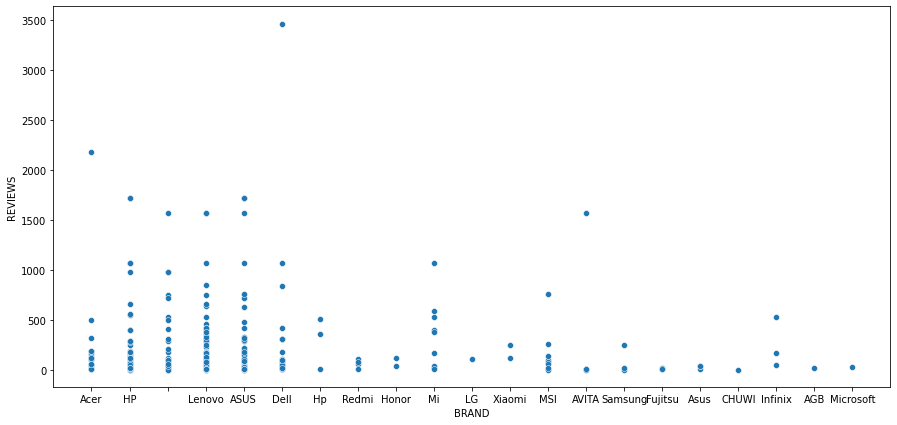

In [44]:
plt.figure(figsize=(15,7))
sns.scatterplot(df2['BRAND'],df2['REVIEWS'])

c:\users\omeza\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BRAND', ylabel='PRICE'>

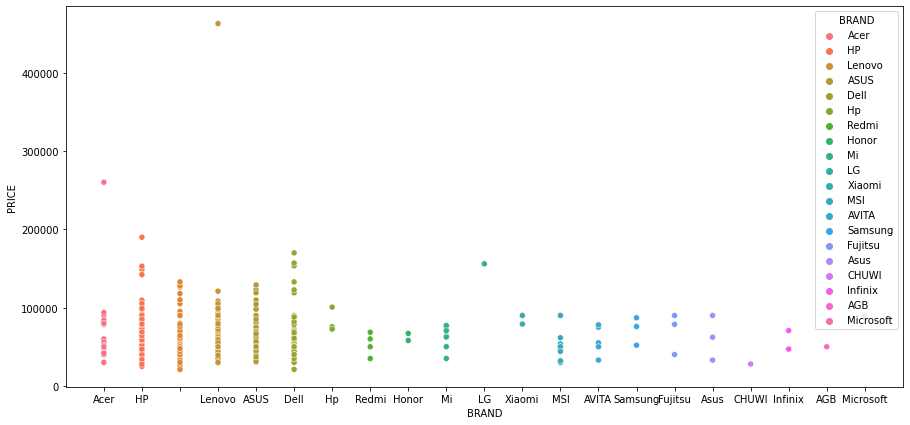

In [45]:
plt.figure(figsize=(15,7))
sns.scatterplot(df2['BRAND'],df2['PRICE'],hue=df2['BRAND'])

c:\users\omeza\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BRAND', ylabel='DISCOUNT_PRICE'>

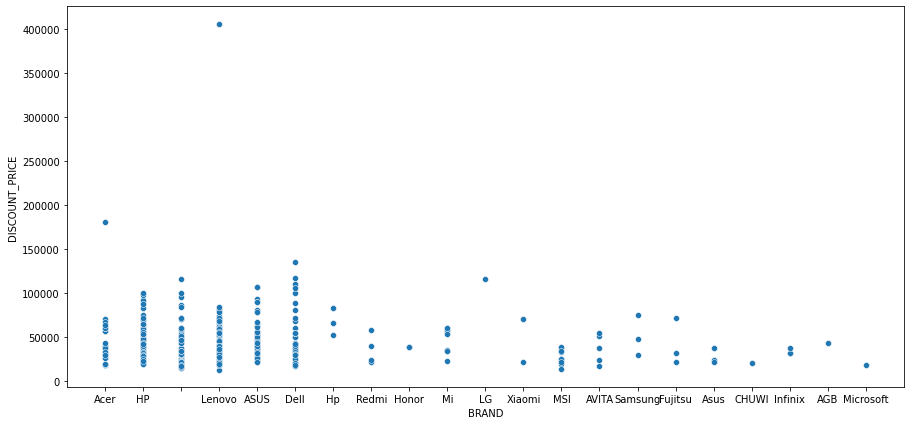

In [46]:
plt.figure(figsize=(15,7))
sns.scatterplot(df2['BRAND'],df2['DISCOUNT_PRICE'])

c:\users\omeza\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PROCESSOR', ylabel='PRICE'>

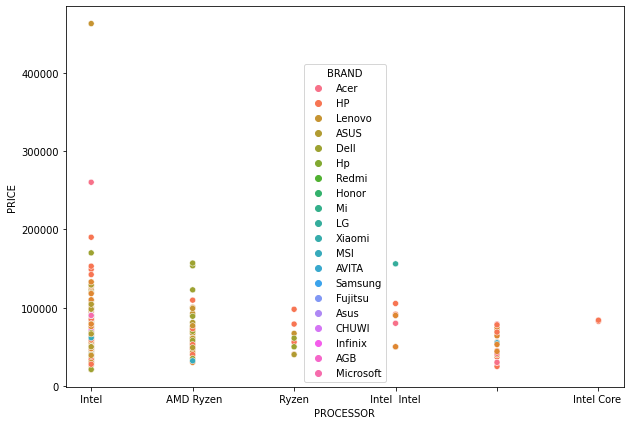

In [47]:
plt.figure(figsize=(10, 7))
sns.scatterplot(df2['PROCESSOR'],df2['PRICE'],hue=df2['BRAND'])

c:\users\omeza\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PROCESSOR', ylabel='REVIEWS'>

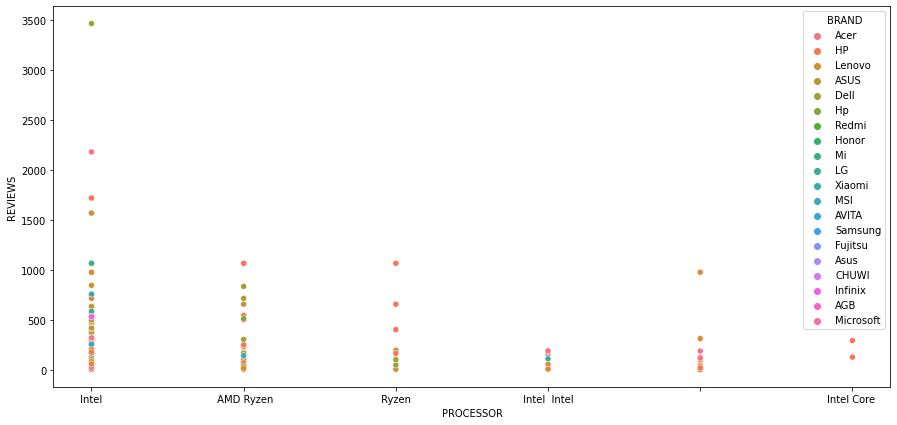

In [48]:
plt.figure(figsize=(15, 7))
sns.scatterplot(df2['PROCESSOR'],df2['REVIEWS'],hue=df2['BRAND'])

c:\users\omeza\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='RAM', ylabel='REVIEWS'>

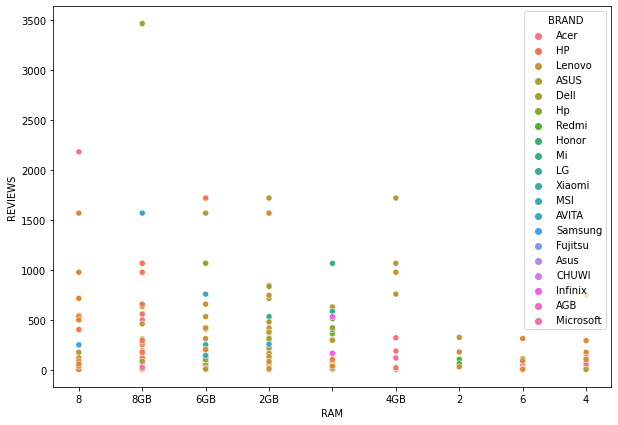

In [49]:
plt.figure(figsize=(10, 7))
sns.scatterplot(df2['RAM'],df2['REVIEWS'],hue=df2['BRAND'])

c:\users\omeza\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='STORAGE', ylabel='REVIEWS'>

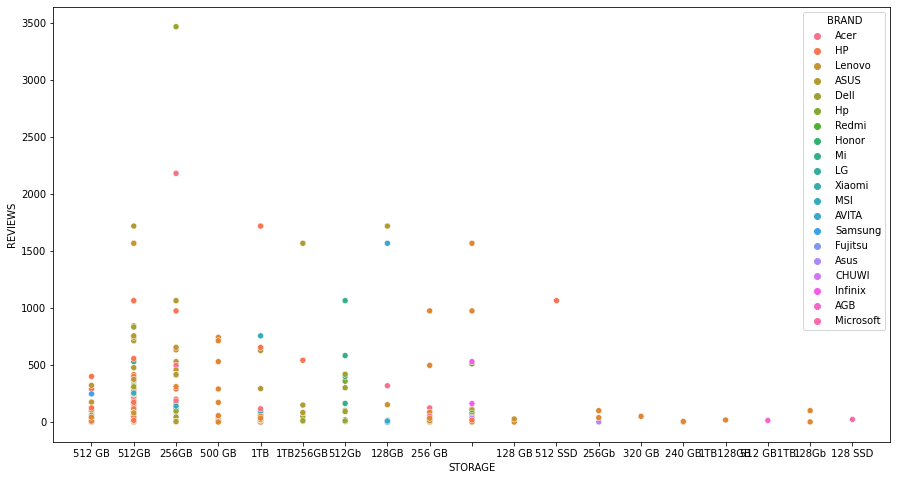

In [50]:
plt.figure(figsize=(15, 8))
sns.scatterplot(df2['STORAGE'],df2['REVIEWS'],hue=df2['BRAND'])

c:\users\omeza\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DISCOUNT_PRICE', ylabel='BRAND'>

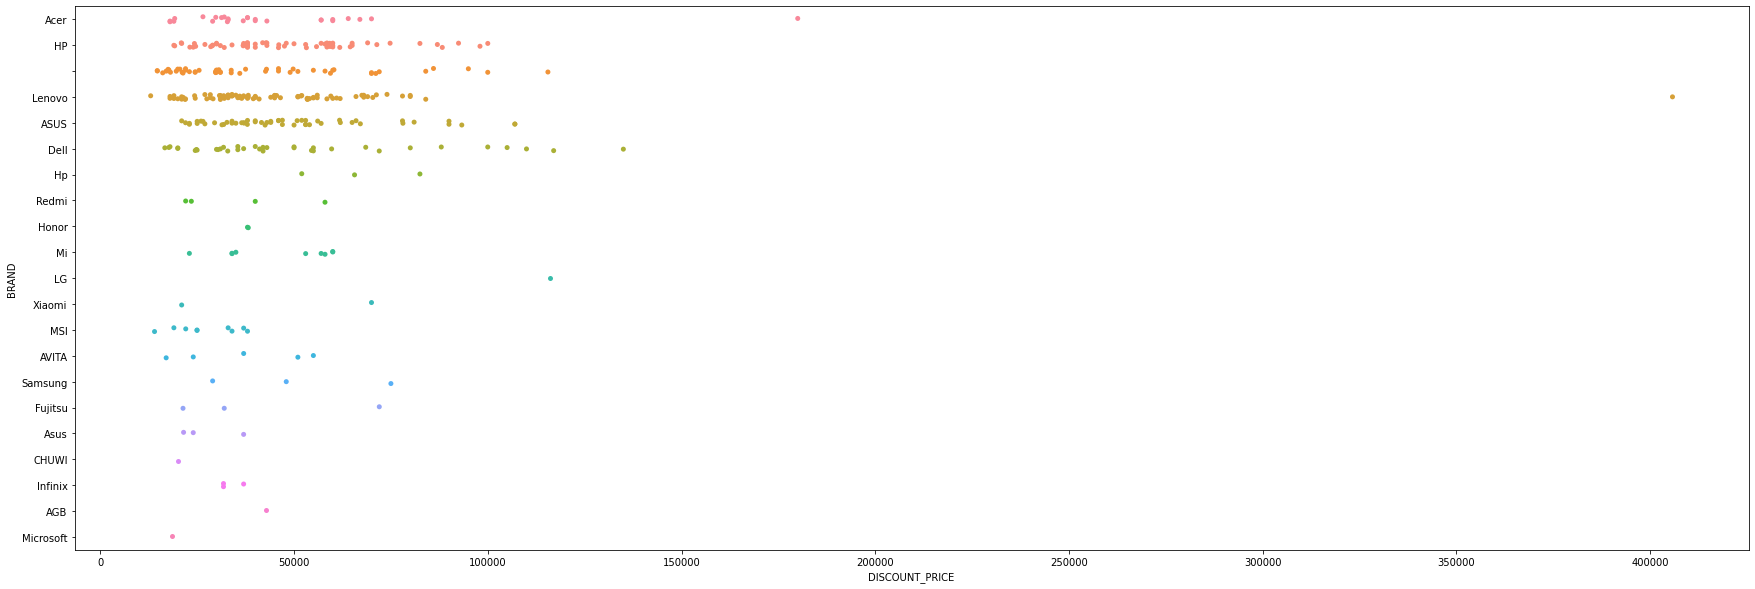

In [51]:

plt.figure(figsize=(30,10))
sns.stripplot(df2['DISCOUNT_PRICE'],df2['BRAND'])

c:\users\omeza\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DISCOUNT_PRICE', ylabel='RAM'>

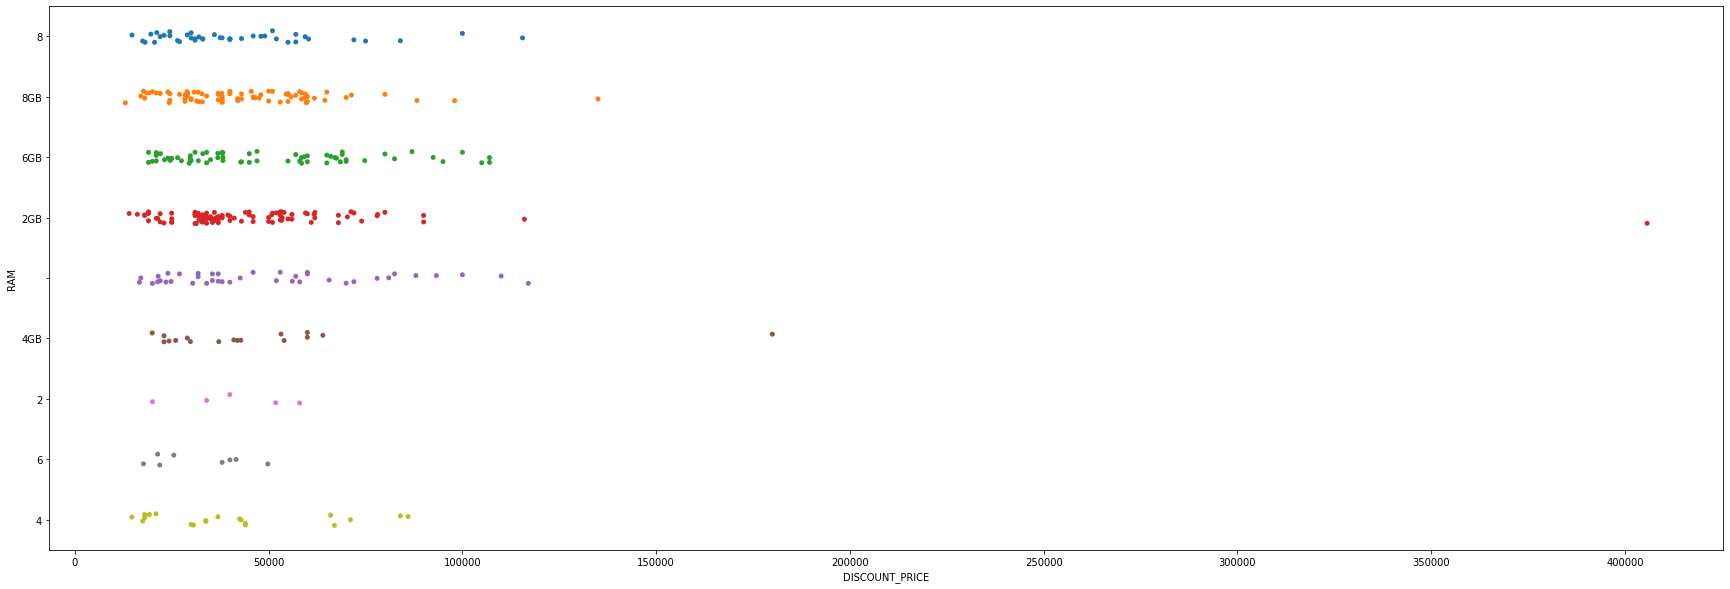

In [52]:
plt.figure(figsize=(30,10))
sns.stripplot(df2['DISCOUNT_PRICE'],df2['RAM'])

c:\users\omeza\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PRICE', ylabel='BRAND'>

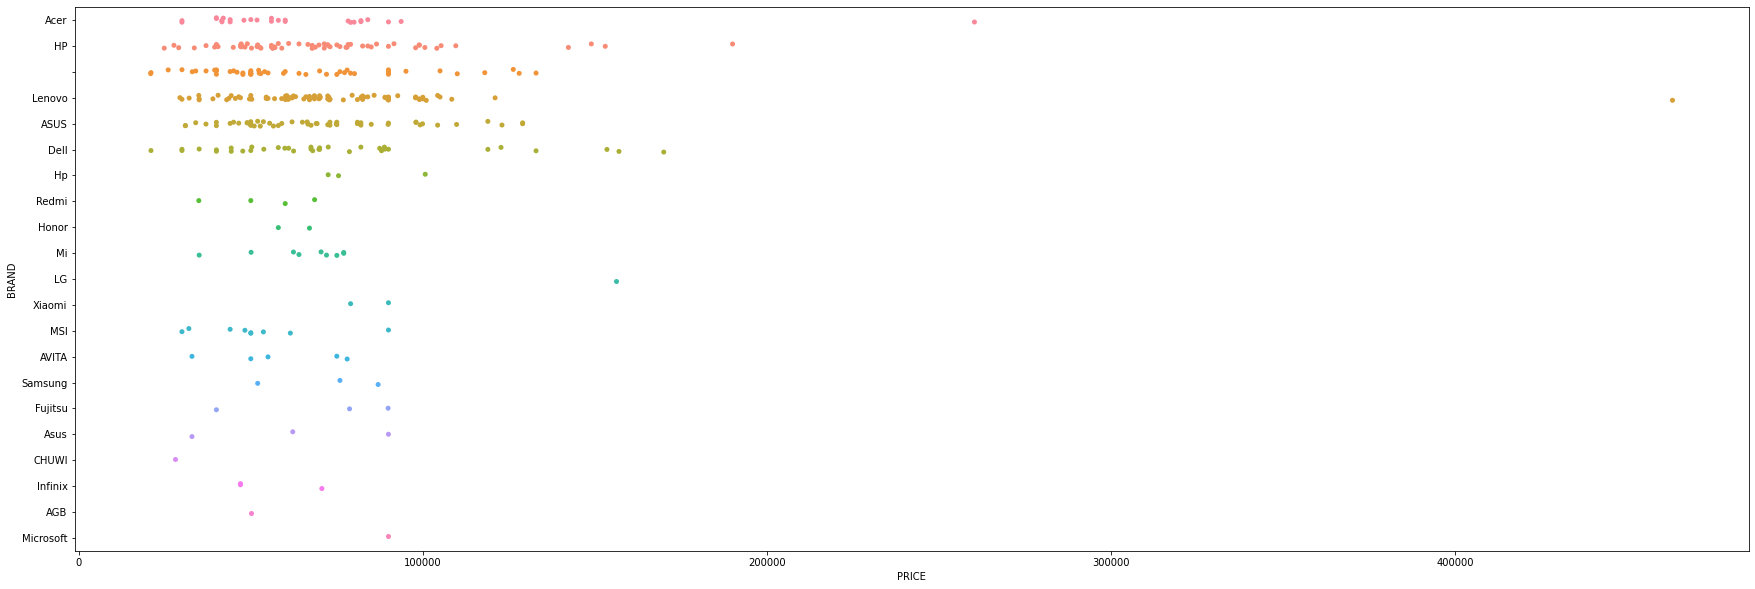

In [53]:
plt.figure(figsize=(30,10))
sns.stripplot(df2['PRICE'],df2['BRAND'])

c:\users\omeza\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PRICE', ylabel='RAM'>

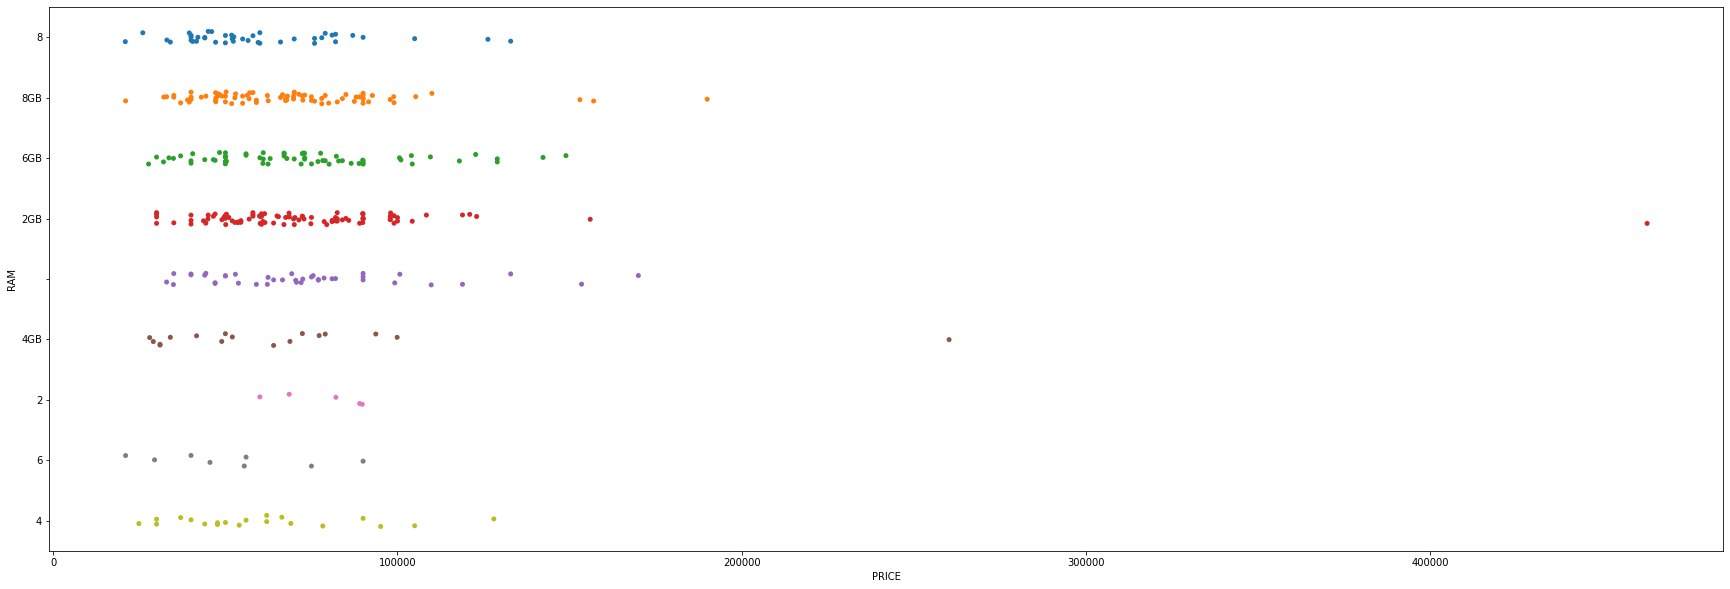

In [54]:
plt.figure(figsize=(30,10))
sns.stripplot(df2['PRICE'],df2['RAM'])

c:\users\omeza\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PRICE', ylabel='STORAGE'>

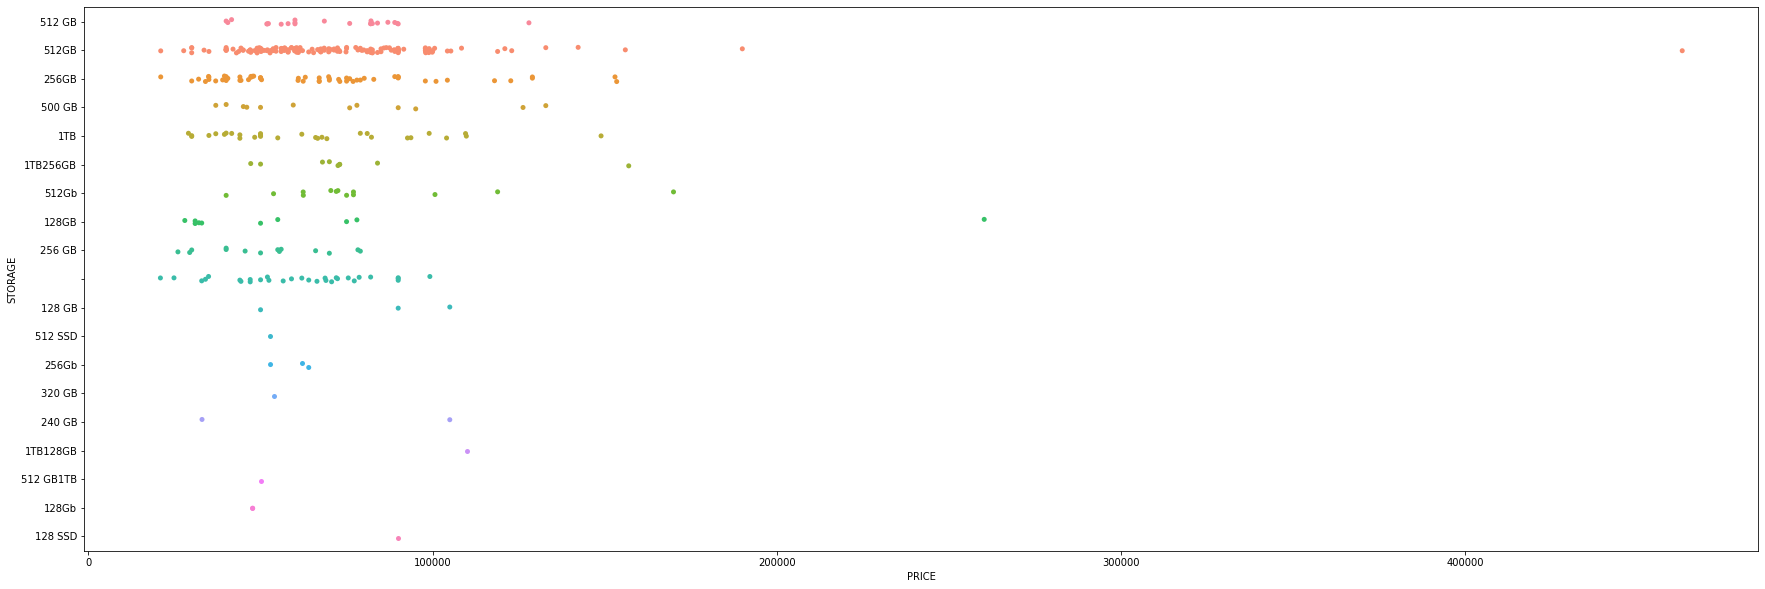

In [55]:
plt.figure(figsize=(30,10))
sns.stripplot(df2['PRICE'],df2['STORAGE'])

In [56]:
df2.groupby(['BRAND']).agg({'PRICE' : ['min', 'max', 'mean']})

PRICE                       
              min     max           mean
BRAND                                   
            20900  132890   63401.188679
AGB         49990   49990   49990.000000
ASUS        30990  128990   69898.555556
AVITA       32900   77996   58177.000000
Acer        29990  260290   66239.423077
Asus        32900   89999   61696.333333
CHUWI       27990   27990   27990.000000
Dell        20990  170000   74215.444444
Fujitsu     40000   89902   69530.666667
HP          24844  189999   69625.469697
Honor       57999   67050   62524.500000
Hp          72479  100687   82885.333333
Infinix     46990   70650   54876.666667
LG         156000  156000  156000.000000
Lenovo      29399  463132   75149.741176
MSI         29990   89999   51046.333333
Mi          34999   76999   64764.333333
Microsoft   89999   89999   89999.000000
Redmi       34890   68537   53356.500000
Samsung     51999   86999   71632.666667
Xiaomi      78999   89999   84499.000000

<AxesSubplot:xlabel='BRAND', ylabel='DISCOUNT_PRICE'>

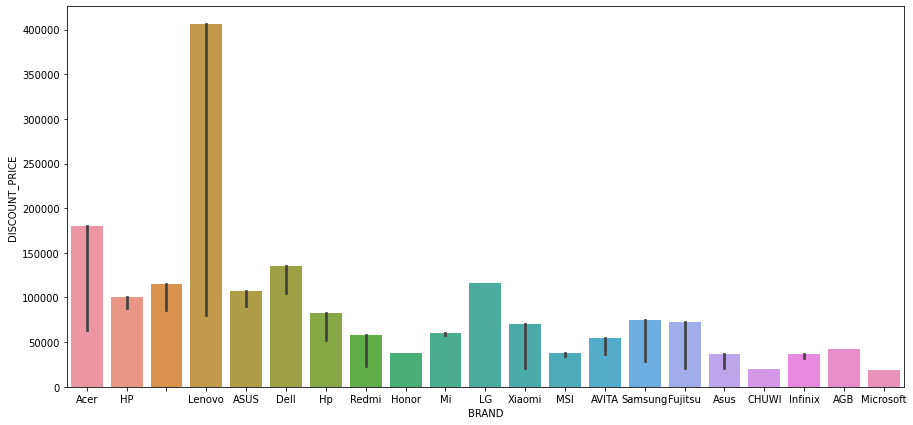

In [57]:
plt.figure(figsize=(15, 7))
sns.barplot(x='BRAND',y='DISCOUNT_PRICE',data=df2,estimator=max)

<AxesSubplot:xlabel='BRAND', ylabel='PRICE'>

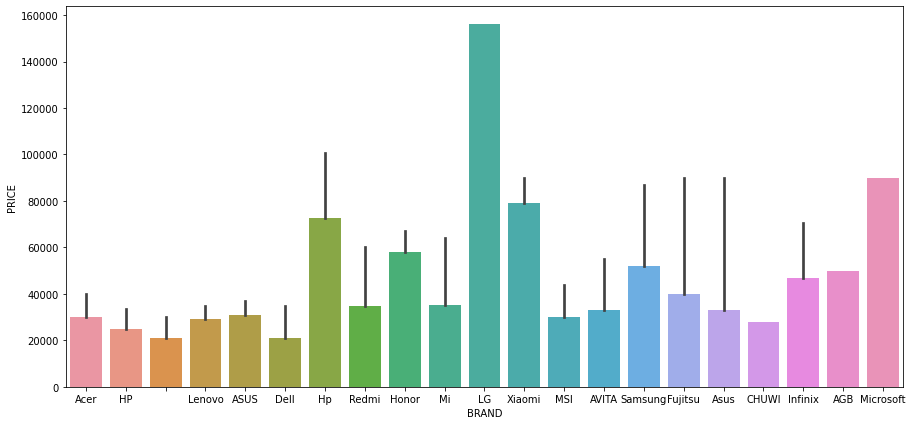

In [58]:
plt.figure(figsize=(15, 7))
sns.barplot(x='BRAND',y='PRICE',data=df2,estimator=min)

# MULTI VARIATE ANALYSIS

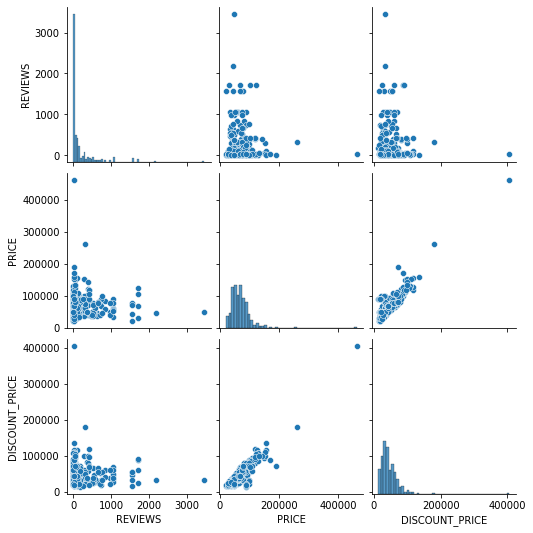

In [59]:
sns.pairplot(df2,palette='coolwarm')

In [60]:
df2.to_csv("amazon1")